In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsdata2.head()

In [5]:
#Import data
df=pd.read_csv('/Users/nidhi.anil/Downloads/train_ctrUa4K.csv')

In [6]:

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape

(614, 13)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#data cleaning , delaing with categorical null values
df.drop(["Loan_ID","Dependents"],axis=1,inplace=True)
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#dealing with categorical null values

cols=df[["Gender","Married","Self_Employed"]]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

In [12]:
df.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#dealing with numerical values
n_cols =df[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in n_cols:
    df[i].fillna(df[i].mean(), inplace=True)


In [15]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
#Visualisation
def bar_chart(col):
    Approved=df[df["Loan_Status"]=="Y"][col].value_counts()
    Disapproved=df[df["Loan_Status"]=="N"][col].value_counts()
    
    df1=pd.DataFrame([Approved,Disapproved])
    df1.index=["Approved","Disapproved"]
    df1.plot(kind="bar")

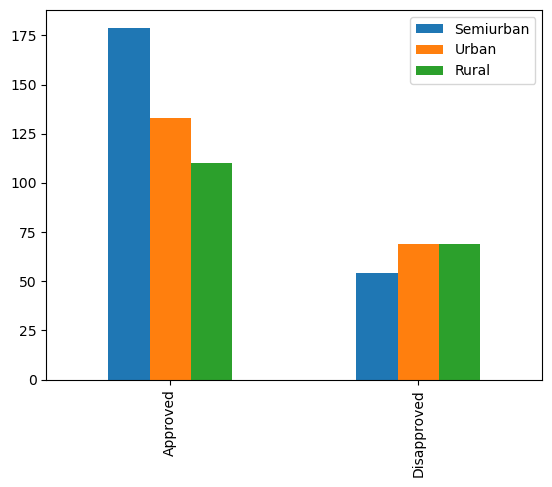

In [17]:
bar_chart("Property_Area")

In [18]:
#encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder()
df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=ord_enc.fit_transform(df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [19]:
df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].astype('int')

In [20]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [23]:
#Model Development

from sklearn.model_selection import train_test_split
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [24]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2


In [25]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print(x_train.shape)

(491, 10)


In [28]:
print(y_train.shape)

(491,)


In [29]:
##1. Logistic Regression
#Model creation
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# predictions using test data
y_pred_lr = logit_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_lr,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.7560975609756098
Precision =  0.7597114317425083
Recall =  0.6428571428571428
f1 score =  0.6531954887218046
Confusion matrix =
  [[13 26]
 [ 4 80]]


In [32]:
##2. kNN
#Choosing k value
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

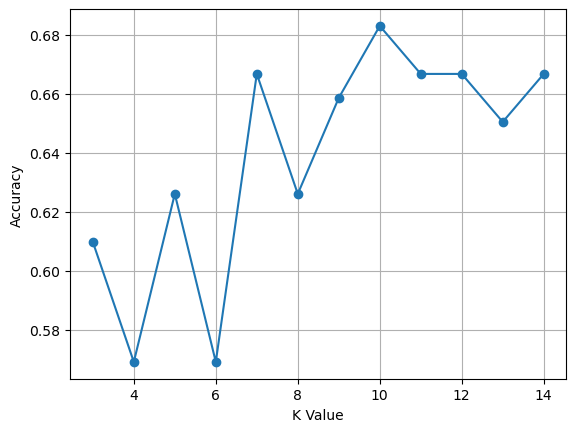

In [33]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [34]:
# Model creation using selected k value
Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [35]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.6829268292682927
Precision =  0.6092233009708738
Recall =  0.5686813186813187
f1 score =  0.5652134505574187
Confusion matrix =
  [[10 29]
 [10 74]]


In [36]:
##3. SVM Model
#Using linear kernel

from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [37]:
y_pred_svm=svmclf.predict(x_test)

In [38]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  0.7804878048780488
Precision =  0.8450196592398427
Recall =  0.6607142857142857
f1 score =  0.6753348323394271
Confusion matrix =
  [[13 26]
 [ 1 83]]


In [39]:
#4. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred_dt = dt_clf.predict(x_test)

In [41]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  0.6910569105691057
Precision =  0.6378246753246752
Recall =  0.6295787545787546
f1 score =  0.6327781269641735
Confusion matrix =
  [[18 21]
 [17 67]]


In [42]:
#5. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [43]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.7560975609756098
Precision =  0.7239583333333333
Recall =  0.6771978021978022
f1 score =  0.6893939393939394
Confusion matrix =
  [[18 21]
 [ 9 75]]


SVM Model gives more accuracy

In [45]:
df_test=pd.read_csv('/Users/nidhi.anil/Downloads/test_lAUu6dG.csv')

In [46]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
df_test.drop(["Loan_ID","Dependents"],axis=1,inplace=True)

In [49]:
df_test.isnull().sum()

Gender               11
Married               0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
##dealing with categorical null values
cols=df_test[["Gender","Married","Self_Employed"]]
for i in cols:
    df_test[i].fillna(df_test[i].mode().iloc[0], inplace=True)
df_test.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [51]:
##dealing with numerical values

n_cols =df_test[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in n_cols:
    df_test[i].fillna(df_test[i].mean(), inplace=True)
    
df_test.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
#encoding categorical variables

from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder()
df_test[["Gender","Married","Education","Self_Employed","Property_Area"]]=ord_enc.fit_transform(df_test[["Gender","Married","Education","Self_Employed","Property_Area"]])

In [53]:
df_test[["Gender","Married","Education","Self_Employed","Property_Area"]]=df_test[["Gender","Married","Education","Self_Employed","Property_Area"]].astype('int')


In [54]:
y_pred_svm1=svmclf.predict(df_test)

In [55]:
y_pred_svm1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [57]:
data2 = pd.read_csv("/Users/nidhi.anil/Downloads/sample_submission_49d68Cx.csv")

In [58]:
data2.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [59]:
data2['Loan_Status'] = y_pred_svm1

In [60]:
data2.head(30)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [61]:
# Replace the 'Loan_Status' column with a column of YES/NO values
data2["Loan_Status"] = data2["Loan_Status"].replace({1 : "Y", 0 : "N"})

In [62]:
data2.head(30)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [63]:
data2.to_csv("sample_submission.csv", index=False)